In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [2]:
heart_df = pd.read_csv('../data/other CSVs/cardio_train.csv', sep=';')

In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
heart_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
y = heart_df.cardio
X = heart_df.drop(columns=['cardio', 'id'])

In [6]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.58807588, 1.        , 0.57948718, ..., 0.        , 0.        ,
        1.        ],
       [0.73015873, 0.        , 0.51794872, ..., 0.        , 0.        ,
        1.        ],
       [0.6240031 , 0.        , 0.56410256, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.64018583, 1.        , 0.65641026, ..., 0.        , 1.        ,
        0.        ],
       [0.90073558, 0.        , 0.55384615, ..., 0.        , 0.        ,
        0.        ],
       [0.75431669, 0.        , 0.58974359, ..., 0.        , 0.        ,
        1.        ]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

In [ ]:
def clf(classifier):
    model = classifier()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)
#     cm = confusion_matrix(y_test, y_test_pred)
#     print(f'''True Negatives: {cm[0][0]}
# False Negatives: {cm[1][0]}
# False Positives: {cm[0][1]}
# True Positives: {cm[1][1]}
# -------------------------
    print(f'''Training Data Prediction Accuracy: {round(train_score, 2)}
Testing Data Prediction Accuracy: {round(test_score, 2)}''')
#     cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     cm_disp.plot()
#     plt.title(f'Confusion Matrix')
#     plt.show()

In [26]:
classifiers = {'Logistic Regression Classifier': LogisticRegression, DecisionTreeClassifier, RandomForestClassifier}
for classifier in classifiers:
    name = f'{classifier}"'
    print(name)
    clf(classifier)

"<class 'sklearn.linear_model._logistic.LogisticRegression'>"
Training Data Prediction Accuracy: 0.65
Testing Data Prediction Accuracy: 0.65
"<class 'sklearn.tree._classes.DecisionTreeClassifier'>"
Training Data Prediction Accuracy: 1.0
Testing Data Prediction Accuracy: 0.64
"<class 'sklearn.ensemble._forest.RandomForestClassifier'>"
Training Data Prediction Accuracy: 1.0
Testing Data Prediction Accuracy: 0.71


In [93]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [94]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [95]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66     26333
           1       0.65      0.61      0.63     26167

    accuracy                           0.65     52500
   macro avg       0.65      0.65      0.65     52500
weighted avg       0.65      0.65      0.65     52500



In [96]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      8688
           1       0.67      0.62      0.64      8812

    accuracy                           0.65     17500
   macro avg       0.65      0.65      0.65     17500
weighted avg       0.65      0.65      0.65     17500



In [97]:
cm = confusion_matrix(y_test, y_test_pred)
print(f'True Negatives: {cm[0][0]}')
print(f'False Negatives: {cm[1][0]}')
print(f'False Positives: {cm[0][1]}')
print(f'True Positives: {cm[1][1]}')

True Negatives: 5941
False Negatives: 3318
False Positives: 2747
True Positives: 5494


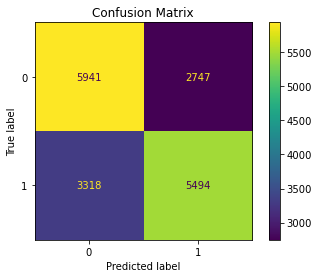

In [107]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [99]:
train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)
print(f'''Training Data Prediction Accuracy: {round(train_score, 2)}
Testing Data Prediction Accuracy: {round(test_score, 2)}''')

Training Data Prediction Accuracy: 0.65
Testing Data Prediction Accuracy: 0.65
